In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from processor.pykrx import 

plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False

In [2]:
pykrx_info_df = pd.read_csv("./data/pykrx_info_df.csv", index_col=0)

In [3]:
class PYKRX_INFO_PREPROCESSOR:
    def __init__(self, pykrx_info_df) -> None:
        self.pykrx_info_df = pykrx_info_df
        self.trader_df = self.preprocessing()

    def preprocessing(self):
        trader_df = self.pykrx_info_df.copy()
        trader_df = self.append_Corp(trader_df)
        trader_df = self.append_Foreign(trader_df)
        trader_df = self.append_Individual(trader_df)
        trader_df["Date"] = pd.to_datetime(trader_df["Date"])
        return trader_df

    @staticmethod
    def append_Corp(trader_df, corp_args=["금융투자", "투신", "사모"]):
        trader_df["Corp"] = trader_df.loc[:, corp_args].sum(axis=1)
        return trader_df

    @staticmethod
    def append_Foreign(trader_df, foreign_args=["외국인"]):
        trader_df["Foreign"] = trader_df.loc[:, foreign_args].sum(axis=1)
        return trader_df

    @staticmethod
    def append_Individual(trader_df, indivisual_args=["개인"]):
        trader_df["Individual"] = trader_df.loc[:, indivisual_args].sum(axis=1)
        return trader_df

    def get_main_trader_df(self, market="KOSPI"):
        self.args = ["Corp", "Foreign", "Individual"]
        trader_df = self.trader_df
        trader_market_df = trader_df[trader_df["Market"] == market].copy()
        main_columns = ["Date"] + self.args
        main_trader_df = trader_market_df.loc[:, main_columns]
        return main_trader_df

In [4]:
pykrx_info_preprocessor = PYKRX_INFO_PREPROCESSOR(pykrx_info_df)

kospi_trader_df = pykrx_info_preprocessor.get_main_trader_df(market='KOSPI')
kosdaq_trader_df = pykrx_info_preprocessor.get_main_trader_df(market='KOSDAQ')

In [5]:
args = pykrx_info_preprocessor.args

In [10]:
kospi_trader_df.tail(2)

,Date,Corp,Foreign,Individual
1922,2023-11-21,111992100022,352944596175,-438296851264
1923,2023-11-22,-131834353471,142986688363,-5788762618


In [9]:
pd.DataFrame(kospi_trader_df[args].tail(3).sum()).T

,Corp,Foreign,Individual
0,352793888809,595896139063,-983468585321


In [11]:
pd.DataFrame(kospi_trader_df[args].tail(10).sum()).T

,Corp,Foreign,Individual
0,1701540316049,1788517119820,-3548442685902


In [15]:
kosdaq_trader_df.tail(5)

,Date,Corp,Foreign,Individual
957,2023-11-16,-55097528283,-21119959025,83410742745
958,2023-11-17,-97261763852,-181074760813,290382892795
959,2023-11-20,33944058521,187090914307,-214069688798
960,2023-11-21,-91902055362,14975012894,91207310432
961,2023-11-22,-105207302716,-53695516686,174288534551


In [16]:
pd.DataFrame(kosdaq_trader_df[args].tail(5).sum()).T

,Corp,Foreign,Individual
0,-315524591692,-53824309323,425219791725


In [17]:
pd.DataFrame(kosdaq_trader_df[args].tail(10).sum()).T

,Corp,Foreign,Individual
0,-495183485888,338753705405,283509753594


/opt/homebrew/anaconda3/envs/quant_trading/lib/python3.10/site-packages/matplotlib/axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
/opt/homebrew/anaconda3/envs/quant_trading/lib/python3.10/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/opt/homebrew/anaconda3/envs/quant_trading/lib/python3.10/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
/opt/homebrew/anaconda3/envs/quant_trading/lib/python3.10/site-packages/matplotlib/axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in

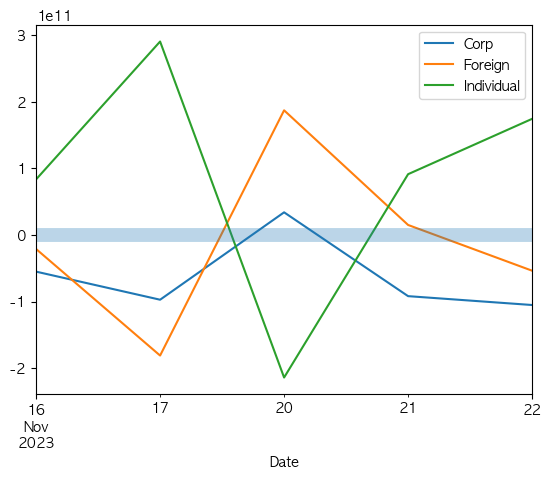

In [26]:
kosdaq_trader_df.set_index("Date").tail(5).plot()
plt.axhline(0,linewidth=10,alpha=0.3)

In [28]:
import warnings

warnings.filterwarnings(action="ignore")

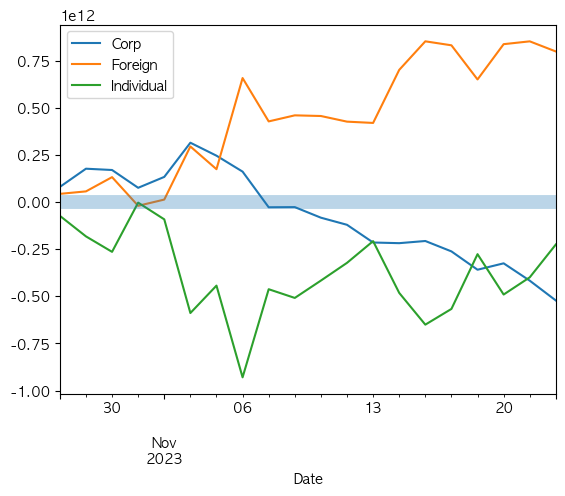

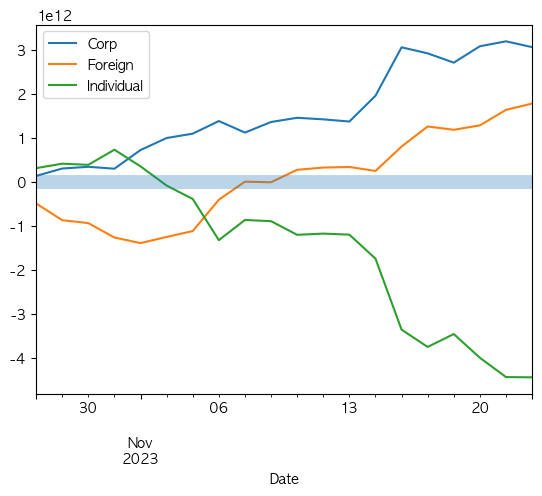

In [34]:
kosdaq_trader_df.set_index("Date").tail(20).cumsum().plot()
plt.axhline(0, linewidth=10, alpha=0.3)

kospi_trader_df.set_index("Date").tail(20).cumsum().plot()
plt.axhline(0, linewidth=10, alpha=0.3)